In [65]:
import os
import tensorflow as tf
from tensorflow.core.util import event_pb2
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

figsize=(10, 6)
export_dir = './plots_tournament/'
load_dir = './tournament_data/'
filetype = 'pdf'

env_name = 'pure_coordination'
row_name = ['S', 'M', 'L', 'O']
col_name = ['SP1', 'PP3']

sns.set()
sns.set_context("talk")
sns.set(rc={'figure.figsize':figsize})
sns.set_style("darkgrid", {"axes.facecolor":".93"})

In [66]:
avg_rewards = np.empty((len(row_name), len(col_name)))
plot_dict = {'avg_rewards': [],
             'rel_rewards': [],
             'config': [],
             'method': []}
df = pd.DataFrame(plot_dict)
for row in np.arange(len(row_name)):
    for col in np.arange(len(col_name)):
        loaded = np.load(os.path.join(load_dir,env_name+'_'+row_name[row]+'_'+col_name[col]+'.npz'))
        current_reward = np.mean(loaded['rewards'])
        avg_rewards[row, col] = current_reward
        df.loc[len(df.index)] = [current_reward, current_reward/avg_rewards[row, 0] ,row_name[row], col_name[col]]
# df.pivot(index='config', columns='method', values='rel_rewards')

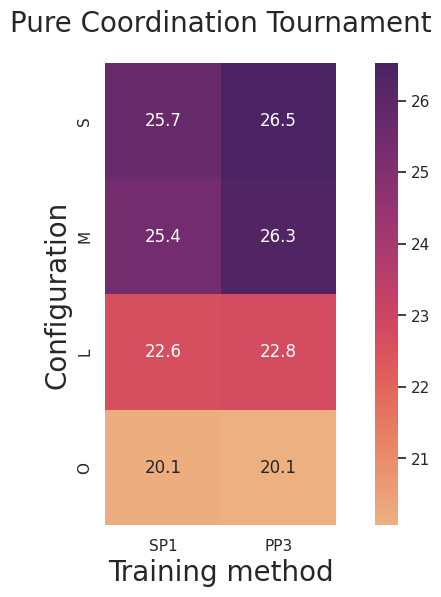

In [67]:
df_value = df.pivot(index='config', columns='method', values='avg_rewards')
df_value_sorted = df_value.reindex(index=row_name, columns=col_name)
ax = sns.heatmap(df_value_sorted, annot=True, fmt=".1f", square = True, cmap='flare')

ax.set_title((env_name.replace('_',' ')+' Tournament').title(), fontsize=20, y=1.05)
ax.set_xlabel('Training method', fontsize=20)
ax.set_ylabel('Configuration', fontsize=20)

plt.savefig(os.path.join(export_dir, env_name.replace('_',' ')+' tournament value.'+filetype), bbox_inches='tight')

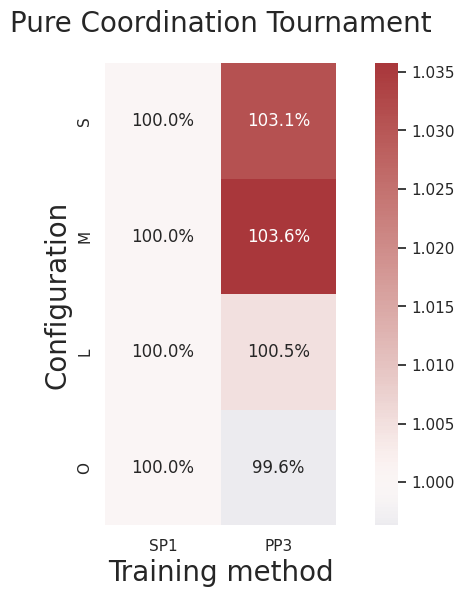

In [68]:
df_pct = df.pivot(index='config', columns='method', values='rel_rewards')
df_pct_sorted = df_pct.reindex(index=row_name, columns=col_name)
ax = sns.heatmap(df_pct_sorted, annot=True, fmt=".1%", square = True, cmap='vlag', center=1)

ax.set_title((env_name.replace('_',' ')+' Tournament').title(), fontsize=20, y=1.05)
ax.set_xlabel('Training method', fontsize=20)
ax.set_ylabel('Configuration', fontsize=20)

plt.savefig(os.path.join(export_dir, env_name.replace('_',' ')+' tournament pct.'+filetype), bbox_inches='tight')